In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

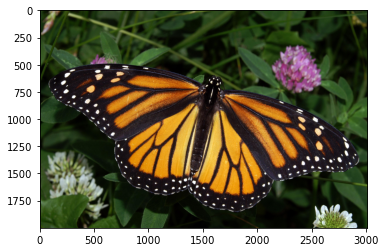

In [3]:
image = cv2.imread('images/monarch.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [5]:
# Reshape this pixel into 2D array of pixels and 3 color values (RGB)
pixel_value = image_copy.reshape((-1,3))

# Convert to float type 
pixel_value = np.float32(pixel_value)


In [8]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

k = 2
# 10 is the iterations to stop
retval,labels,centers = cv2.kmeans(pixel_value,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

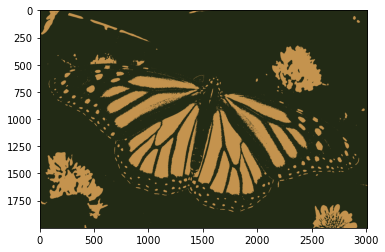

In [11]:
# To display this data convert it into 8 - bit value
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape this image into orignal dimensions
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0],image_copy.shape[1])

plt.imshow(segmented_image)

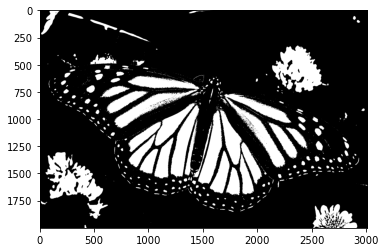

In [12]:
plt.imshow(labels_reshape == 1,cmap = 'gray')

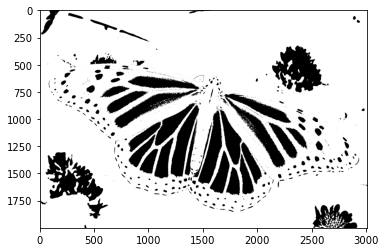

In [13]:
plt.imshow(labels_reshape != 1,cmap = 'gray')

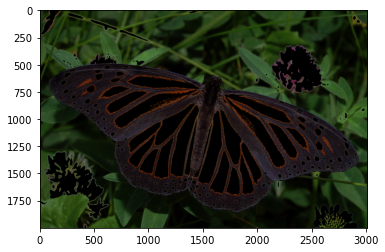

In [14]:
masked_image = np.copy(image_copy)
masked_image[labels_reshape == 1] = [0,0,0]
plt.imshow(masked_image)